In [ ]:
### Code creates plots for DGE effect size analysis shown in Extended data figure 7

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scanpy as sc
import pandas as pd
import seaborn as sb

In [2]:
bleo_order = ['Alveolum','Airway','Macrophages','Monocytes','DC','B cells',
              'Plasma cells','T cells','NK','Granulocytes','Fibroblasts',
              'Pericytes','SMC','Mesothelium','Capillary ECs', 'Vascular ECs','Lymphatic ECs']

In [3]:
def format_tables(tab, regulated = "up", logfc = "05", days = ["d3", "d10", "d20", "d30", "d37"]):
    
    logfc_short = "genes_logfc_%s" %logfc
    tab = tab.filter(like = regulated, axis = 0)
    tmp = tab.loc[:, logfc_short]
    #display(tmp)
    
    tab = pd.DataFrame(index = tab.index.values)
    tab["cell_type"] = [" ".join(i.split("_")[:-2]) for i in tab.index]
    tab["time_point"] = [i.split("_")[-2::][0] for i in tab.index]
    
    tab["cell_type"] = tab.cell_type.astype('category')
    #print(np.setdiff1d(bleo_order, tab.cell_type.cat.categories))
    
    order = [o for o in bleo_order if o in tab.cell_type.cat.categories]
    tab.cell_type = tab.cell_type.cat.reorder_categories(order)
    tab["time_point"] = tab.time_point.astype('category')
    tab.time_point = tab.time_point.cat.reorder_categories(days)
    tab["number_genes"] = [len(genes.split(",")) if isinstance(genes, str) else 0 for genes in tmp]
    return tab

def pivot_save_tables(tab, logfc = "05", regulated = "up", save = None, suffix = ""):
    
    tab = pd.pivot(tab, index = "cell_type", columns = "time_point").fillna(0)
    tab.columns = tab.columns.get_level_values(1)
    
    if save:
        filename = "nr_%sregulated_genes_logFC%s%s.txt" %(regulated, logfc, suffix)
        print("Saving to %s" %filename)
        tab.to_csv(plot_folder + filename, sep = "\t")
    return tab


### Young Mice

In [4]:
folder  = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_young/"
tab_genes = pd.read_csv(folder + "control_vs_bleo_regulated_genes_timepoints_meta_label_young.txt",
                        sep = "\t", index_col = 0)
tab_genes.head(2)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Alveolum_d3_up,"Malt1,Nme1,Nfe2l2,Ndufb6,Myl12a,Mrpl33,Mif,Mdm...","2200002D01Rik,Psmb8,Ppa1,Pkm,Phf11d,Perp,Pabpc...","Actb,Slpi,Psmb8,Phf11d,Ly6i,Lgals9,Isg15,Irf9,..."
Alveolum_d3_down,"Acaca,Ralbp1,Rabep1,Rab27b,Rab11fip2,Pygo1,Ptm...","Ank3,Mecom,Mettl7a1,Myh7,Nckap5,Npc1,Nrn1,Ocia...","Aox3,CT010467.1,Gm42418"


In [5]:
tab = format_tables(tab_genes, regulated = "up", logfc = "05")
tab.head()

,cell_type,time_point,number_genes
Alveolum_d3_up,Alveolum,d3,460
Alveolum_d10_up,Alveolum,d10,755
Alveolum_d20_up,Alveolum,d20,589
Alveolum_d30_up,Alveolum,d30,112
Alveolum_d37_up,Alveolum,d37,106


In [6]:
tab.cell_type.value_counts()

cell_type
Alveolum         5
Granulocytes     5
Vascular ECs     5
Capillary ECs    5
Mesothelium      5
SMC              5
Pericytes        5
Fibroblasts      5
NK               5
Airway           5
T cells          5
Plasma cells     5
B cells          5
DC               5
Monocytes        5
Macrophages      5
Lymphatic ECs    5
Name: count, dtype: int64

In [7]:
list(tab.index)

['Alveolum_d3_up',
 'Alveolum_d10_up',
 'Alveolum_d20_up',
 'Alveolum_d30_up',
 'Alveolum_d37_up',
 'Airway_d3_up',
 'Airway_d10_up',
 'Airway_d20_up',
 'Airway_d30_up',
 'Airway_d37_up',
 'Macrophages_d3_up',
 'Macrophages_d10_up',
 'Macrophages_d20_up',
 'Macrophages_d30_up',
 'Macrophages_d37_up',
 'Monocytes_d3_up',
 'Monocytes_d10_up',
 'Monocytes_d20_up',
 'Monocytes_d30_up',
 'Monocytes_d37_up',
 'DC_d3_up',
 'DC_d10_up',
 'DC_d20_up',
 'DC_d30_up',
 'DC_d37_up',
 'B_cells_d3_up',
 'B_cells_d10_up',
 'B_cells_d20_up',
 'B_cells_d30_up',
 'B_cells_d37_up',
 'Plasma_cells_d3_up',
 'Plasma_cells_d10_up',
 'Plasma_cells_d20_up',
 'Plasma_cells_d30_up',
 'Plasma_cells_d37_up',
 'T_cells_d3_up',
 'T_cells_d10_up',
 'T_cells_d20_up',
 'T_cells_d30_up',
 'T_cells_d37_up',
 'NK_d3_up',
 'NK_d10_up',
 'NK_d20_up',
 'NK_d30_up',
 'NK_d37_up',
 'Granulocytes_d3_up',
 'Granulocytes_d10_up',
 'Granulocytes_d20_up',
 'Granulocytes_d30_up',
 'Granulocytes_d37_up',
 'Fibroblasts_d3_up',
 'Fibrob

In [8]:
## Pivot this table into the right format
tab = pd.pivot(tab, index = "cell_type", columns = "time_point").fillna(0)
tab.columns = tab.columns.get_level_values(1)
tab.iloc[:5, :10]

time_point,d3,d10,d20,d30,d37
cell_type,,,,,
Alveolum,460,755,589,112,106
Airway,118,340,167,62,202
Macrophages,366,294,191,153,164
Monocytes,190,169,90,278,87
DC,406,293,157,99,107


### Tidy up and save tables

In [9]:
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"
tab_genes = pd.read_csv(folder + "control_vs_bleo_regulated_genes_timepoints_meta_label_young.txt", 
                        sep = "\t", index_col = 0)
tab_genes.head(2)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Alveolum_d3_up,"Malt1,Nme1,Nfe2l2,Ndufb6,Myl12a,Mrpl33,Mif,Mdm...","2200002D01Rik,Psmb8,Ppa1,Pkm,Phf11d,Perp,Pabpc...","Actb,Slpi,Psmb8,Phf11d,Ly6i,Lgals9,Isg15,Irf9,..."
Alveolum_d3_down,"Acaca,Ralbp1,Rabep1,Rab27b,Rab11fip2,Pygo1,Ptm...","Ank3,Mecom,Mettl7a1,Myh7,Nckap5,Npc1,Nrn1,Ocia...","Aox3,CT010467.1,Gm42418"


In [10]:
## Already save the tables for each combination
for reg in ["up", "down"]:
    for logfc in ["05", "1", "2"]:
        tab = format_tables(tab_genes, regulated = reg, logfc = logfc)
        tab = pivot_save_tables(tab, regulated = reg, logfc = logfc, save = True, suffix = "_young")

tab.iloc[:4, :10]

Saving to nr_upregulated_genes_logFC05_young.txt
Saving to nr_upregulated_genes_logFC1_young.txt
Saving to nr_upregulated_genes_logFC2_young.txt
Saving to nr_downregulated_genes_logFC05_young.txt
Saving to nr_downregulated_genes_logFC1_young.txt
Saving to nr_downregulated_genes_logFC2_young.txt


time_point,d3,d10,d20,d30,d37
cell_type,,,,,
Alveolum,3,8,9,4,9
Airway,13,3,3,0,3
Macrophages,9,48,26,34,20
Monocytes,0,4,1,1,0


### Old Mice

In [11]:
folder  = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_old/"
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"

tab_genes = pd.read_csv(folder + "control_vs_bleo_regulated_genes_timepoints_meta_label_old.txt",
                        sep = "\t", index_col = 0)
tab_genes.head(2)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Alveolum_d3_up,"Isg20,Lgals9,Ldha,Lcn2,Krt8,Itm2b,mt-Nd4,Inka2...","H2-D1,H2-Q6,H2-Q7,H2afz,Ifi27l2a,Inka2,Itm2b,L...","Anxa1,B2m,Bst2,Ccng1,Cdkn1a,Dmkn,Ephx1,H2-Q6,I..."
Alveolum_d3_down,"mt-Rnr1,Lamb3,Lgi3,Rps24,Luc7l2,Luc7l3,Macc1,M...","Ankrd11,Rflnb,Rif1,Rpl22,Rpl37a,Rpl39,Rplp1,Rp...",Gm42418


In [12]:
## Already save the tables for each combination
for reg in ["up", "down"]:
    for logfc in ["05", "1", "2"]:
        tab = format_tables(tab_genes, regulated = reg, logfc = logfc)
        tab = pivot_save_tables(tab, regulated = reg, logfc = logfc, save = True, suffix = "_old")

tab.iloc[:4, :10]

Saving to nr_upregulated_genes_logFC05_old.txt
Saving to nr_upregulated_genes_logFC1_old.txt
Saving to nr_upregulated_genes_logFC2_old.txt
Saving to nr_downregulated_genes_logFC05_old.txt
Saving to nr_downregulated_genes_logFC1_old.txt
Saving to nr_downregulated_genes_logFC2_old.txt


time_point,d3,d10,d20,d30,d37
cell_type,,,,,
Alveolum,1,4,3,7,16
Airway,7,3,0,3,6
Macrophages,1,35,10,17,12
Monocytes,1,1,0,3,15


### Export the plots with pheatmap

In [13]:
from rpy2.robjects import pandas2ri
pandas2ri.activate()
%load_ext rpy2.ipython

In [14]:
%%R

suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(pheatmap))
suppressPackageStartupMessages(library(gridExtra))

white_red <- colorRampPalette(c("white", "red", "red4"))(100)
white_blue <- colorRampPalette(c("white", "cornflowerblue", "darkblue"))(100)

In addition: Warning message:
In (function (package, help, pos = 2, lib.loc = NULL, character.only = FALSE,  :
  library ‘/usr/lib/R/site-library’ contains no packages


In [15]:
%%R
plot_heatmap <- function(logfc = "05", age = "young", save = NA){
    tab_up <- read.delim(paste0("nr_upregulated_genes_logFC", logfc, "_", age, ".txt"),
                         sep = "\t", stringsAsFactors = F, row.names = 1)
    tab_down <- read.delim(paste0("nr_downregulated_genes_logFC", logfc, "_", age, ".txt"),
                           sep = "\t", stringsAsFactors = F, row.names = 1)
    p1 <- pheatmap(tab_up, scale = "none", cluster_rows = T, cluster_cols = F, color = white_red, fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("upregulated in ", age, " - logFC > ", logfc),
                   silent = T)[[4]]
    p2 <- pheatmap(tab_down, scale = "none", cluster_rows = T, cluster_cols = F, color = white_blue, fontsize = 14,
                   angle_col = "45", border_color = "black", main = paste0("downregulated in ", age, " - logFC > ", logfc),
                   silent = T)[[4]]

    grid.arrange(p1, p2, ncol = 2)
    if(!(is.na(save))){
        print(paste0("Saving to heatmap_effect_size_logFC", logfc, "_", age, ".pdf"))
        ggsave(file = paste0("heatmap_effect_size_logFC", logfc, "_", age, ".pdf"), arrangeGrob(p1, p2, ncol = 2),
               width = 15, height = 6)
        
    }
}

### young Mice
#### logFC 05

[1] "Saving to heatmap_effect_size_logFC05_young.pdf"


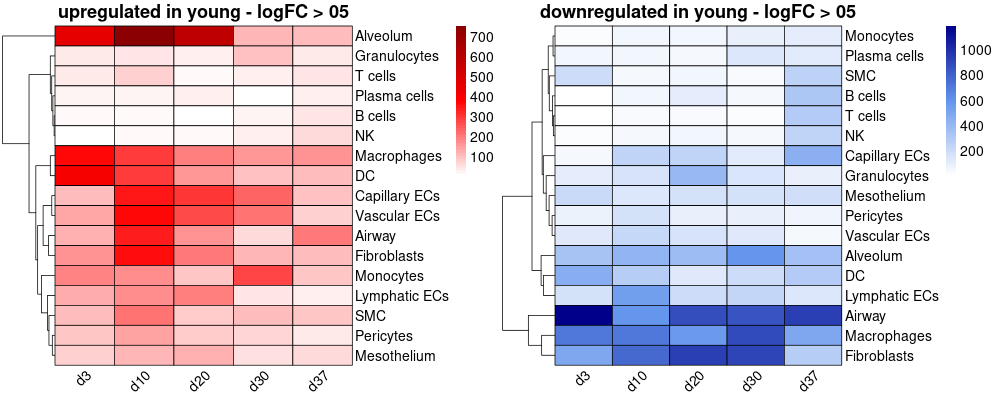

In [16]:
%%R -i plot_folder -w 1000 -h 400

setwd(plot_folder)
plot_heatmap(logfc = "05", age = "young", save = T)

### old Mice
#### logFC 05

[1] "Saving to heatmap_effect_size_logFC05_old.pdf"


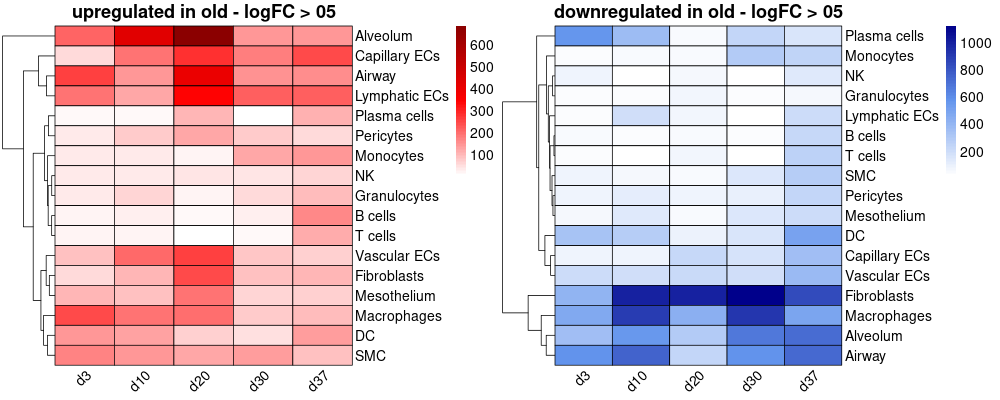

In [19]:
%%R -i plot_folder -w 1000 -h 400

setwd(plot_folder)
plot_heatmap(logfc = "05", age = "old", save = T)

### Add on, have young and old in one Heatmap, with same Scale

In [22]:
%%R -i plot_folder
setwd(plot_folder)

logfc <- "05"
tab_young <- read.delim(paste0("nr_upregulated_genes_logFC", logfc, "_young.txt"),
                     sep = "\t", stringsAsFactors = F, row.names = 1)
tab_old <- read.delim(paste0("nr_upregulated_genes_logFC", logfc, "_old.txt"),
                       sep = "\t", stringsAsFactors = F, row.names = 1)
head(tab_young, 4)

             d3 d10 d20 d30 d37
Alveolum    460 755 589 112 106
Airway      118 340 167  62 202
Macrophages 366 294 191 153 164
Monocytes   190 169  90 278  87


In [23]:
%%R
## Combine
colnames(tab_young) <- paste0("young_", colnames(tab_young))
colnames(tab_old) <- paste0("old_", colnames(tab_old))
tab_young$cell_type <- rownames(tab_young)
tab_old$cell_type <- rownames(tab_old)

tab <- merge(tab_young, tab_old, by = "cell_type")
rownames(tab) <- tab$cell_type
tab$cell_type <- NULL

write.table(tab, file = "effect_size_DGE_logFC05_bleo_vs_control_timepoints_up_meta.csv")

head(tab, 25)

              young_d3 young_d10 young_d20 young_d30 young_d37 old_d3 old_d10
Airway             118       340       167        62       202    260     142
Alveolum           460       755       589       112       106    213     429
B cells             10        16         2        21        44     22      29
Capillary ECs      100       343       296       233        99     55     189
DC                 406       293       157        99       107    142     126
Fibroblasts        164       361       200       114       100     50      98
Granulocytes        38        45        28        97        35     32      61
Lymphatic ECs      128       173       196        41        29    187     118
Macrophages        366       294       191       153       164    241     187
Mesothelium         75       112       116        54        61    104      84
Monocytes          190       169        90       278        87     33      36
NK                   9        14        11        30        56  

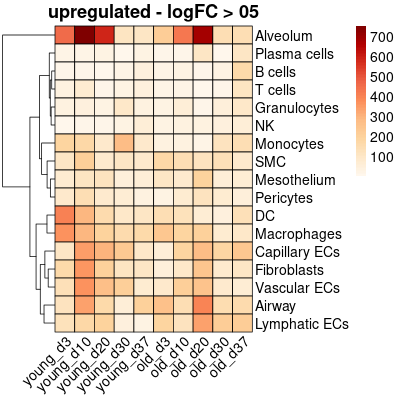

In [24]:
%%R -w 400 -h 400
library(RColorBrewer)
p1 <- pheatmap(tab, scale = "none", cluster_rows = T, cluster_cols = F, color =colorRampPalette(brewer.pal(9, "OrRd"))(100), fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("upregulated - logFC > ", logfc))
ggsave(file = paste0("heatmap_effect_size_logFC", logfc, "_young_and_old_down_Reds.pdf"), p1,
       width = 6, height = 6)

In [25]:
%%R
p <- pheatmap(tab, scale = "none", cluster_rows = T, cluster_cols = F, color = white_red, fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("upregulated - logFC > ", logfc), silent = T)[[4]]
ggsave(file = paste0("heatmap_effect_size_logFC", logfc, "_young_and_old.pdf"), p,
       width = 6, height = 6)

In [26]:
%%R -i plot_folder
setwd(plot_folder)

logfc <- "05"
tab_young <- read.delim(paste0("nr_downregulated_genes_logFC", logfc, "_young.txt"),
                     sep = "\t", stringsAsFactors = F, row.names = 1)
tab_old <- read.delim(paste0("nr_downregulated_genes_logFC", logfc, "_old.txt"),
                       sep = "\t", stringsAsFactors = F, row.names = 1)
colnames(tab_young) <- paste0("young_", colnames(tab_young))
colnames(tab_old) <- paste0("old_", colnames(tab_old))
tab_young$cell_type <- rownames(tab_young)
tab_old$cell_type <- rownames(tab_old)

tab <- merge(tab_young, tab_old, by = "cell_type")
rownames(tab) <- tab$cell_type
tab$cell_type <- NULL

write.table(tab, file = "effect_size_DGE_logFC05_bleo_vs_control_timepoints_down_meta.csv")

head(tab, 25)

              young_d3 young_d10 young_d20 young_d30 young_d37 old_d3 old_d10
Airway            1183       589       867       851       928    578     756
Alveolum           334       424       376       584       346    354     555
B cells              3        53       108        39       319     42      29
Capillary ECs       49       245       249       111       450     82      79
DC                 456       275       132       194       292    332     274
Fibroblasts        496       766       932       907       285    411     993
Granulocytes       106       164       403       148        95     29      28
Lymphatic ECs      180       536       202       237       134     36     190
Macrophages        704       704       558       885       495    468     893
Mesothelium        212       141       170       180       189     52     131
Monocytes           17        54        54        86       105     32      43
NK                  24        41        61        42       244  

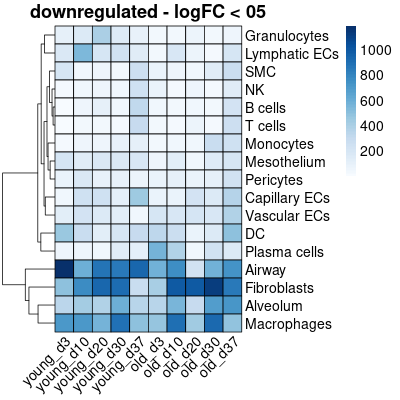

In [27]:
%%R -w 400 -h 400
p1 <- pheatmap(tab, scale = "none", cluster_rows = T, cluster_cols = F, color=colorRampPalette(brewer.pal(9, "Blues"))(100), fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("downregulated - logFC < ", logfc))
ggsave(file = paste0("heatmap_effect_size_logFC", logfc, "_young_and_old_down_Blues.pdf"), p1,
       width = 6, height = 6)

In [28]:
%%R
p <- pheatmap(tab, scale = "none", cluster_rows = T, cluster_cols = F, color = white_blue, fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("downregulated - logFC > ", logfc), silent = T)[[4]]
ggsave(file = paste0("heatmap_effect_size_logFC", logfc, "_young_and_old_down.pdf"), p,
       width = 6, height = 6)

### Young vs old

In [29]:
folder  = "/media/HDD_1/Janine/Aging_SingleCell/data/DGE_data/dge_meta_label_young_vs_old/"
plot_folder = "/home/gotej/Projects/Aging_BleoModel/Plots/"
tab_genes = pd.read_csv(folder + "control_vs_bleo_regulated_genes_timepoints_meta_label_young_vs_old.txt",
                        sep = "\t", index_col = 0)
tab_genes.head(10)

,genes_logfc_05,genes_logfc_1,genes_logfc_2
Alveolum_d0_up,"Acot1,Trf,Rps28,Nrn1,Lrg1,mt-Cytb,Itih4,Lcn2,H...","H2-D1,H2-K1",NaN
Alveolum_d0_down,"Anp32b,CT010467.1,Dst,Gm42418,Hnrnpa3,Macf1,Sp...",CT010467.1,NaN
Alveolum_d3_up,"H2-Q7,H2-K1,mt-Nd4,Lcn2,Lrg1,Ly6i,Nrn1,Pigr,Pr...","H2-Q7,Nrn1,Pigr,mt-Co1,Fmo2",NaN
Alveolum_d3_down,"Tspan8,Tpm3,Gm42418,Rps24,Hnrnpu,Hsp90aa1,Hsp9...","Gm42418,Rps24,Tspan8,Perp,Areg,Tuba1b,Gdf15,Isg15",Gm42418
Alveolum_d10_up,"Lrg1,Scd1,Chil1,Sftpb,Slc34a2,Lcn2,Fasn,Cxcl15...","Lrg1,Itih4,Cd74,Nrn1,H2-Q7,Slc6a20a,Hnmt,Isyna...","H2-Q7,Slc6a20a"
Alveolum_d10_down,"Krt8,Lamc2,Ybx1,Krt19,2200002D01Rik,Calm1,Pttg...","Lamc2,Krt19,Pttg1ip,Ahnak,Myh9,S100a14,Perp,Gs...",NaN
Alveolum_d20_up,"Cyp2b10,Fth1,mt-Cytb,mt-Nd4,Lcn2,H2-D1,H2-K1,C...","H2-K1,mt-Nd4,H2-D1,Fth1,Cyp2b10,Pigr,AC149090....",Pigr
Alveolum_d20_down,"Dstn,Hnrnpa3,Ncl,Ptma,Gm42418,Hsp90ab1,Hbegf,H...",Hopx,NaN
Alveolum_d30_up,"mt-Nd5,Rgcc,Pigr,mt-Nd4,Cbr2,mt-Cytb,mt-Nd2,Ly...","mt-Nd5,Rgcc,Pigr,mt-Nd4,Lcn2,H2-K1,Fth1,mt-Cyt...","Pigr,mt-Nd4,Ly6i,Fmo2,Slc6a20a"
Alveolum_d30_down,"Hsp90ab1,Hsp90aa1,Gm42418,CT010467.1,Sptbn1,Rp...","Hsp90aa1,Gm42418,Hsp90ab1,CT010467.1,Hdc,Smc3,...",NaN


In [30]:
bleo_order = ['Alveolum','Airway','Macrophages','Monocytes','DC','B cells',
              'Plasma cells','T cells','NK','Granulocytes','Fibroblasts',
              'Pericytes','SMC','Mesothelium','Capillary ECs', 'Vascular ECs','Lymphatic ECs']

In [31]:
def format_tables(tab, regulated = "up", logfc = "05", days = ["d0", "d3", "d10", "d20", "d30", "d37"]):
    
    logfc_short = "genes_logfc_%s" %logfc
    tab = tab.filter(like = regulated, axis = 0)
    tmp = tab.loc[:, logfc_short]
    #display(tmp)
    
    tab = pd.DataFrame(index = tab.index.values)
    tab["cell_type"] = [" ".join(i.split("_")[:-2]) for i in tab.index]
    tab["time_point"] = [i.split("_")[-2::][0] for i in tab.index]
    
    tab["cell_type"] = tab.cell_type.astype('category')
    print(np.setdiff1d(bleo_order, tab.cell_type.cat.categories))
    
    order = [o for o in bleo_order if o in tab.cell_type.cat.categories]
    tab.cell_type = tab.cell_type.cat.reorder_categories(order)
    tab["time_point"] = tab.time_point.astype('category')
    tab.time_point = tab.time_point.cat.reorder_categories(days)
    tab["number_genes"] = [len(genes.split(",")) if isinstance(genes, str) else 0 for genes in tmp]
    return tab

def pivot_save_tables(tab, logfc = "05", regulated = "up", save = None, suffix = ""):
    
    tab = pd.pivot(tab, index = "cell_type", columns = "time_point").fillna(0)
    tab.columns = tab.columns.get_level_values(1)
    
    if save:
        filename = "nr_%sregulated_genes_logFC%s%s.txt" %(regulated, logfc, suffix)
        print("Saving to %s" %filename)
        tab.to_csv(plot_folder + filename, sep = "\t")
    return tab

In [32]:
 ## Already save the tables for each combination
for reg in ["up", "down"]:
    for logfc in ["05", "1", "2"]:
        tab = format_tables(tab_genes, regulated = reg, logfc = logfc, days = ["d0", "d3", "d10", "d20", "d30", "d37"] )
        tab = pivot_save_tables(tab, regulated = reg, logfc = logfc, save = True, suffix = "_youngVSold")

[]
Saving to nr_upregulated_genes_logFC05_youngVSold.txt
[]
Saving to nr_upregulated_genes_logFC1_youngVSold.txt
[]
Saving to nr_upregulated_genes_logFC2_youngVSold.txt
[]
Saving to nr_downregulated_genes_logFC05_youngVSold.txt
[]
Saving to nr_downregulated_genes_logFC1_youngVSold.txt
[]
Saving to nr_downregulated_genes_logFC2_youngVSold.txt


In [57]:
 %%R -i plot_folder
setwd(plot_folder)

logfc <- "05"
tab_up <- read.delim(paste0("nr_upregulated_genes_logFC", logfc, "_youngVSold.txt"),
                     sep = "\t", stringsAsFactors = F, row.names = 1)
tab_down <- read.delim(paste0("nr_downregulated_genes_logFC", logfc, "_youngVSold.txt"),
                       sep = "\t", stringsAsFactors = F, row.names = 1)

write.table(tab_up, file = "effect_size_DGE_logFC05_young_vs_old_up_meta.csv")
write.table(tab_down, file = "effect_size_DGE_logFC05_young_vs_old_down_meta.csv")

print(head(tab_up, 20))
print(head(tab_down, 20))

               d0  d3 d10 d20 d30 d37
Alveolum       18  65 123 298 267  88
Airway         32 180   5 189  89 113
Macrophages    89 136  21 108  98  76
Monocytes      98  40  22  63 130  42
DC             34 114  11  53 165 112
B cells        48  39  52  76  59 189
Plasma cells   47  21  21  25  80  70
T cells        49  45  34  21  46 183
NK              9  29  16  22  32  24
Granulocytes   22  35  45  32  69  50
Fibroblasts    76  61  57 468  65  24
Pericytes      25  25  54  63  59  12
SMC            68 185  44 101  75  23
Mesothelium    24 100  31  75  54  68
Capillary ECs  38  41  43  67  85 296
Vascular ECs  135 101 106  72  90  19
Lymphatic ECs  21  92  50  81 170  34
               d0  d3 d10 d20 d30 d37
Alveolum       11 128 376  33  82 219
Airway        329  44 399  29 192 332
Macrophages    41  47  51  25  54 145
Monocytes      16  61   6  39 187  26
DC             13  54  12  22  36 129
B cells        26  18   2  21  50  22
Plasma cells   54 205  81   8  46  28
T cells     

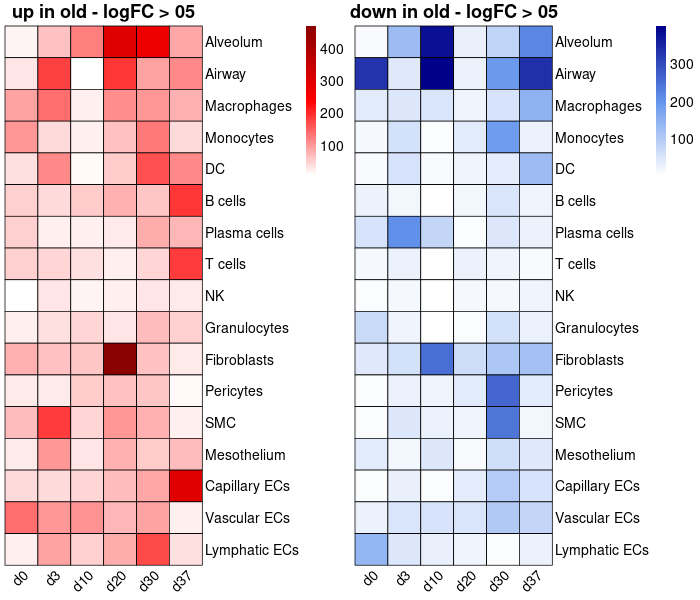

In [58]:
%%R -w 700 -h 600
p1 <- pheatmap(tab_up, scale = "none", cluster_rows = F, cluster_cols = F, color = white_red, fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("up in old - logFC > ", logfc), silent = T)[[4]]
p2 <- pheatmap(tab_down, scale = "none", cluster_rows = F, cluster_cols = F, color = white_blue, fontsize = 14,
         angle_col = "45", border_color = "black", main = paste0("down in old - logFC > ", logfc), silent = T)[[4]]

grid.arrange(p1, p2, ncol = 2)

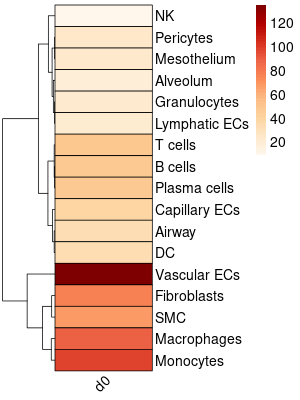

In [59]:
%%R -w 300 -h 400

tab_up <- data.frame(d0 = tab_up[["d0"]], row.names = rownames(tab_up))
p1 <- pheatmap(tab_up, scale = "none", cluster_rows = TRUE, cluster_cols = FALSE, color = colorRampPalette(brewer.pal(9, "OrRd"))(100), 
              fontsize = 14, 
              angle_col = 45, border_color = "black")

ggsave(file = paste0("Heatmap", "_DGEs_baseline_up.pdf"), p1, width = 5, height = 10)

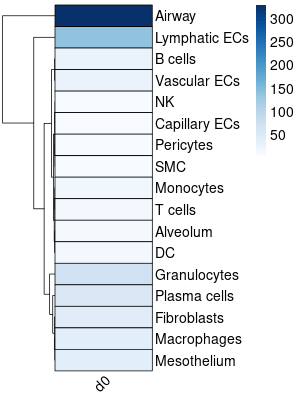

In [56]:
%%R -w 300 -h 400
head(tab_down)
tab_down <- data.frame(d0 = tab_down[["d0"]], row.names = rownames(tab_down))
p2 <- pheatmap(tab_down, scale = "none", cluster_rows = TRUE, cluster_cols = FALSE, color = colorRampPalette(brewer.pal(9, "Blues"))(100), 
              fontsize = 14, 
              angle_col = 45, border_color = "black")
ggsave(file = paste0("Heatmap", "_DGEs_baseline_down.pdf"), p2, width = 5, height = 10)